# Test Notebook to learn how to read in GPS

### Some sources of GPS data

Greenland

http://go-gnet.org/data/

https://www.unavco.org/data/gps-gnss/data-access-methods/data-access-methods.html

____

### Load in some modules

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import glob

from tidegauge_functions import read_GPS_SONEL

%matplotlib inline

### Specify directories and filenames
and other runtime options

In [2]:
dir_in = 'data/GPS'
file_in = 'KULU.cwu.nam14.csv'
ext = 'csv'

In [3]:
filepath = os.path.join(dir_in, file_in)

### Basic `read_csv` to peek into the csv file

In [4]:
# with open(filepath) as myfile:
#     firstNlines=myfile.readlines()[0:5] #put here the interval you want
    
# print(firstNlines)

with open(filepath) as myfile:
    head = [next(myfile) for x in range(13)]
print(head)

['PBO Station Position Time Series.\n', 'Format Version, 1.2.0\n', 'Reference Frame, NAM14\n', '4-character ID, KULU\n', 'Station name, Kulusuk_GPS     \n', 'Begin Date, 1996-07-25\n', 'End Date, 2019-08-13\n', 'Release Date, 2020-02-13\n', 'Source file, KULU.cwu.nam14.pos\n', 'Offset from source file, -6.35 mm North, -27.61 mm East, 69.00 mm Vertical\n', 'Reference position, 65.5793353842 North Latitude, -37.1493578847 East Longitude, 67.48358 meters elevation\n', 'Date, North (mm), East (mm), Vertical (mm), North Std. Deviation (mm), East Std. Deviation (mm), Vertical Std. Deviation (mm), Quality,\n', '1996-07-25,0.00, 0.00, 0.00, 3.08, 2.19, 9.93, repro,\n']


In [5]:
df = pd.read_csv(filepath, skiprows=12, header=None)
df


,0,1,2,3,4,5,6,7,8
0,1996-07-25,0.00,0.00,0.00,3.08,2.19,9.93,repro,NaN
1,1996-07-26,-1.07,-0.16,-0.64,3.72,2.64,12.29,repro,NaN
2,1996-07-27,0.16,-2.04,11.45,4.15,2.93,13.92,repro,NaN
3,1996-07-28,-0.53,-0.65,11.62,3.05,2.19,10.03,repro,NaN
4,1996-07-29,-5.19,-0.85,5.00,2.90,2.07,9.80,repro,NaN
...,...,...,...,...,...,...,...,...,...
6677,2019-08-09,-18.97,-54.44,142.87,2.15,1.47,7.51,suppf,NaN
6678,2019-08-10,-19.59,-53.63,146.31,2.26,1.54,7.76,suppf,NaN
6679,2019-08-11,-19.04,-53.98,150.46,2.28,1.52,7.57,suppf,NaN
6680,2019-08-12,-18.85,-54.11,147.44,2.20,1.52,7.61,suppf,NaN


In [6]:
column_names=['Date', 'North', 'East', 'Vertical', 'NorthSTD', 'EastSTD', 'VerticalSTD', 'Quality', 'NaN'] 
df = pd.read_csv(filepath, skiprows=12, header=None, names=column_names)
dt = pd.to_datetime(df['Date'])
df.index = pd.DatetimeIndex(dt)
df = df.drop('Date', axis=1)
df = df.drop('NaN', axis=1)
df

,North,East,Vertical,NorthSTD,EastSTD,VerticalSTD,Quality
Date,,,,,,,
1996-07-25,0.00,0.00,0.00,3.08,2.19,9.93,repro
1996-07-26,-1.07,-0.16,-0.64,3.72,2.64,12.29,repro
1996-07-27,0.16,-2.04,11.45,4.15,2.93,13.92,repro
1996-07-28,-0.53,-0.65,11.62,3.05,2.19,10.03,repro
1996-07-29,-5.19,-0.85,5.00,2.90,2.07,9.80,repro
...,...,...,...,...,...,...,...
2019-08-09,-18.97,-54.44,142.87,2.15,1.47,7.51,suppf
2019-08-10,-19.59,-53.63,146.31,2.26,1.54,7.76,suppf
2019-08-11,-19.04,-53.98,150.46,2.28,1.52,7.57,suppf


<AxesSubplot:xlabel='Date'>

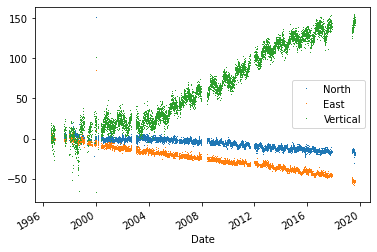

In [7]:
df[['North', 'East', 'Vertical']].plot(linestyle='', marker=',')

/Users/dporter/.conda/envs/tidegauges-historical/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/dporter/.conda/envs/tidegauges-historical/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/dporter/.conda/envs/tidegauges-historical/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if n

array([[<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>]], dtype=object)

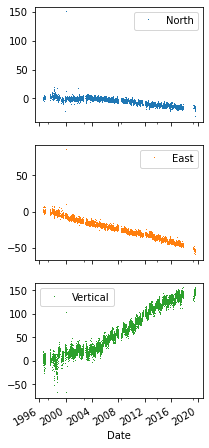

In [8]:
df[['North', 'East', 'Vertical']].plot(subplots=True, 
                                       layout=(3, 1), figsize=(3, 8), 
                                       linestyle='', marker=',',
                                       sharex=True)

<AxesSubplot:ylabel='Frequency'>

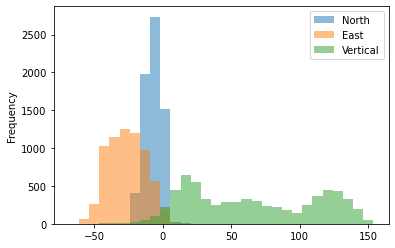

In [9]:
df[['North', 'East', 'Vertical']].plot.hist(alpha=0.5, bins=30)

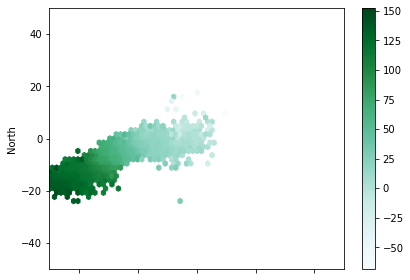

In [10]:
df.plot.hexbin(x='East', y='North', C='Vertical')
plt.xlim([-50, 50])
plt.ylim([-50, 50])
plt.tight_layout()

In [11]:
df.index[-1] - df.index[0]

Timedelta('8419 days 00:00:00')

# Read in SONEL

In [12]:
station = 'NUUK'
datum = 'NGL14'
ext = '.neu'
file_in = 'd' + station + '_43013M001_' + datum + ext
dir_in = 'data/GPS'
filepath = os.path.join(dir_in, file_in)
print(filepath)

data/GPS/dNUUK_43013M001_NGL14.neu


In [13]:
# column_names=['Date', 'North', 'East', 'Vertical', 'NorthSTD', 'EastSTD', 'VerticalSTD', 'Quality', 'NaN'] 
column_names=['Year', 'DN', 'DE', 'DU', 'SDN', 'SDE', 'SDU']
df = pd.read_csv(filepath, skiprows=22, header=None, delimiter='\s+', names=column_names)
# dt = pd.to_datetime(df['Year'])
# df.index = pd.DatetimeIndex(dt)
# df = df.drop('Date', axis=1)
# df = df.drop('NaN', axis=1)
df

,Year,DN,DE,DU,SDN,SDE,SDU
0,2008.7502,-0.0470,0.0758,-0.0311,0.0033,0.0023,0.0054
1,2008.7556,-0.0473,0.0769,-0.0288,0.0021,0.0014,0.0035
2,2008.7584,-0.0463,0.0764,-0.0275,0.0021,0.0014,0.0035
3,2009.0021,-0.0431,0.0743,-0.0350,0.0021,0.0014,0.0034
4,2009.0048,-0.0426,0.0744,-0.0365,0.0021,0.0014,0.0035
...,...,...,...,...,...,...,...
2829,2019.4497,0.0794,-0.1144,-0.0170,0.0021,0.0014,0.0034
2830,2019.4524,0.0796,-0.1157,-0.0229,0.0021,0.0014,0.0034
2831,2019.4552,0.0813,-0.1154,-0.0155,0.0021,0.0014,0.0034
2832,2019.4579,0.0802,-0.1171,-0.0123,0.0020,0.0014,0.0034


In [14]:
# # if necessary
# df['Year'] = df['Year'].astype(str)
# a = df['Year'].str[:4]
# b = df['Year'].str[5:].map(d)

# dt = pd.to_datetime(a + '.' + b, format='%Y.%m')
# print(dt)

In [15]:
year = df['Year'].astype(int)
print (year.describe())

# b = df['Year'].sub(a).add(1/12).mul(12).round(0).astype(int)
doy = ((df['Year'] - year) * 365).astype(int) + 1
print (doy.describe())

count    2834.000000
mean     2012.441426
std         2.295715
min      2008.000000
25%      2010.000000
50%      2012.000000
75%      2014.000000
max      2019.000000
Name: Year, dtype: float64
count    2834.000000
mean      179.447777
std       103.658786
min         1.000000
25%        91.000000
50%       178.500000
75%       267.000000
max       365.000000
Name: Year, dtype: float64


In [16]:
year[doy==365]

366     2009
726     2010
1081    2011
1446    2012
1801    2013
2163    2014
2528    2015
Name: Year, dtype: int64

0      2008-09-30
1      2008-10-02
2      2008-10-03
3      2009-01-01
4      2009-01-02
          ...    
2829   2019-06-14
2830   2019-06-15
2831   2019-06-16
2832   2019-06-17
2833   2019-06-18
Name: Year, Length: 2834, dtype: datetime64[ns]


<AxesSubplot:>

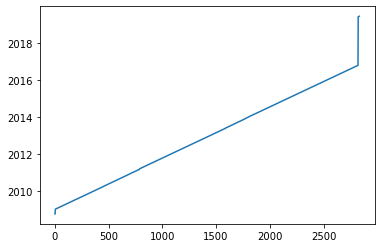

In [17]:
c = pd.to_datetime(year.astype(str) + doy.astype(str), format='%Y%j')
print(c)
c.plot()

<AxesSubplot:xlabel='Year'>

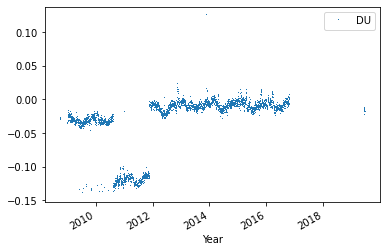

In [18]:
# column_names=['Date', 'North', 'East', 'Vertical', 'NorthSTD', 'EastSTD', 'VerticalSTD', 'Quality', 'NaN'] 
column_names=['Year', 'DN', 'DE', 'DU', 'SDN', 'SDE', 'SDU']
df = pd.read_csv(filepath, skiprows=22, header=None, delimiter='\s+', names=column_names)
year = df['Year'].astype(int)
doy = ((df['Year'] - year) * 365).astype(int) + 1
dt = pd.to_datetime(year.astype(str) + doy.astype(str), format='%Y%j')
df = df.rename(columns={'Year': 'YearDec'})
df.index = pd.DatetimeIndex(dt)
# df = df.drop('Date', axis=1)
# df = df.drop('NaN', axis=1)
df[['DU']].plot(linestyle='',marker=',')

<AxesSubplot:xlabel='Year'>

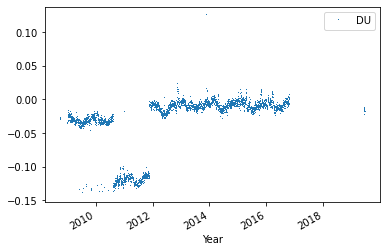

In [19]:
def test_read_GPS_SONEL(sonel_file):
    column_names=['Year', 'DN', 'DE', 'DU', 'SDN', 'SDE', 'SDU']
    df = pd.read_csv(sonel_file, skiprows=22, header=None, delimiter='\s+', names=column_names)
    year = df['Year'].astype(int)
    doy = ((df['Year'] - year) * 365).astype(int) + 1
    dt = pd.to_datetime(year.astype(str) + doy.astype(str), format='%Y%j')
    df = df.rename(columns={'Year': 'YearDec'})
    df.index = pd.DatetimeIndex(dt)

    return df

df_sonel = test_read_GPS_SONEL(filepath)

df_sonel[['DU']].plot(linestyle='',marker=',')



Now using function imported from file...

<AxesSubplot:xlabel='Year'>

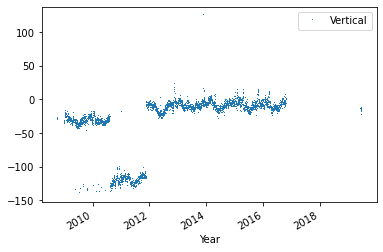

In [20]:
df_sonel = read_GPS_SONEL(filepath)

df_sonel[['Vertical']].plot(linestyle='',marker=',')

# Resample to MONTHLY data

<AxesSubplot:xlabel='Year'>

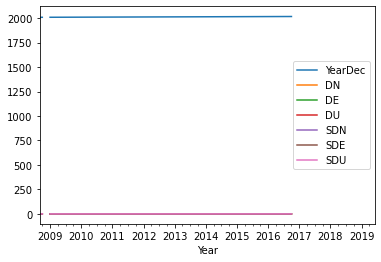

In [21]:
df_monthly = df.dropna().resample('1M').mean()
df_monthly.plot()

## Loop through files

In [22]:
# station = 'NUUK'
datum = 'NGL14'
ext = '.neu'
# file_in = 'd' + station + '_43013M001_' + datum + ext
dir_in = 'data/GPS'

In [35]:

pattern = os.path.join(dir_in, 'd*' + datum + ext)
print(pattern)

data/GPS/d*NGL14.neu


In [38]:
pattern = os.path.join(dir_in, 'd*'+ ext)
print(pattern)

filenames = sorted(glob.glob(pattern))  # , key=alphanum_key)
print(filenames)


data/GPS/d*.neu
['data/GPS/dAB44_99999X006_ULR6B.neu', 'data/GPS/dAB48_XXXXXXXXX_JPL14.neu', 'data/GPS/dAB50_99999X007_ULR6B.neu', 'data/GPS/dALRT_40162M001_ULR6B.neu', 'data/GPS/dANC2_XXXXXXXXX_NGL14.neu', 'data/GPS/dCHUR_40128M002_ULR6B.neu', 'data/GPS/dEYAC_99999X043_ULR6B.neu', 'data/GPS/dJNU1_49519S001_NGL14.neu', 'data/GPS/dKEN5_XXXXXXXXX_NGL14.neu', 'data/GPS/dNUUK_43013M001_NGL14.neu', 'data/GPS/dQAQ1_43007M001_ULR6B.neu', 'data/GPS/dQIKI_40166M001_ULR6B.neu', 'data/GPS/dRESO_40149M001_ULR6B.neu', 'data/GPS/dSCOR_43006M002_ULR6B.neu', 'data/GPS/dTBON_XXXXXXXXX_NGL14.neu', 'data/GPS/dTHU1_43001M001_ULR6B.neu', 'data/GPS/dTHU2_43001M002_ULR6B.neu', 'data/GPS/dTHU3_43001M002_ULR6B.neu']


In [25]:
for f, filepath in enumerate(filenames):
    df = read_GPS_SONEL(filepath)
    print(f'\n\n{filepath}')
    print(df.head())



data/GPS/dANC2_XXXXXXXXX_NGL14.neu
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD
Year                                                             
2009-12-10   85.6  71.0     -35.6       2.2      1.4          3.1
2009-12-11   85.8  68.9     -35.4       2.2      1.4          3.2
2009-12-12   88.6  71.4     -35.9       2.2      1.4          3.2
2009-12-13   87.0  71.0     -33.2       2.2      1.4          3.1
2009-12-14   86.5  70.9     -30.4       2.2      1.4          3.1


data/GPS/dJNU1_49519S001_NGL14.neu
            North   East  Vertical  NorthSTD  EastSTD  VerticalSTD
Year                                                              
2003-01-27  124.8  112.0    -168.5       3.4      2.5          4.6
2003-01-28  127.2  112.2    -164.3       2.7      2.0          3.6
2003-01-29  127.0  105.3    -162.1       2.8      2.1          3.6
2003-01-30  125.8  109.2    -164.5       3.3      2.5          4.3
2003-02-01  127.7  110.0    -162.6       2.7      2.0         

In [46]:
# just a single station
filepath = os.path.join(dir_in, 'dNUUK_43013M001_NGL14' + ext)
df = read_GPS_SONEL(filepath)

### write some test functions for linear regression and plotting

In [47]:
def test_calc_OLS(df, var):
    
    x, y = np.arange(len(df[var].dropna())), df[var].dropna()
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    res = model.fit()
    
    return res

def test_plot_OLS_overlay(df, res, site, var, data_units, simpletrend=True):
    fig, ax = plt.subplots(1, 1, figsize=(12,6));
    ax.plot(df[var].dropna().index, df[var].dropna().values, 
            label='Data', marker=',', linestyle='', color='black')
    
    ## Plot linea model
    if simpletrend:
        ax.plot((df[var].index[0], df[var].index[-1]), 
            (res.params.x1*1 + res.params.const, res.params.x1*df.shape[0] + res.params.const),
               label='Trend', linestyle='--', color='purple')
    else:
            ax.plot(df[var].index, [res.params.x1*i + res.params.const for i in np.arange(len(df[var]))])

    ## zero line
#     ax.plot((df[var].index[0], df[var].index[-1]), (0, 0), 'k')
    
    ## customize
#     ax.set_title(f"Trend = {res.params.x1 * 1000:.2f} mm/yr");
    ax.set_ylabel(data_units)
    plt.suptitle(f"{site}")
    plt.legend()
    plt.savefig(f'figs/test_GPS_OLS_{site}.png')
    
    
res = test_calc_OLS(df, 'Vertical')

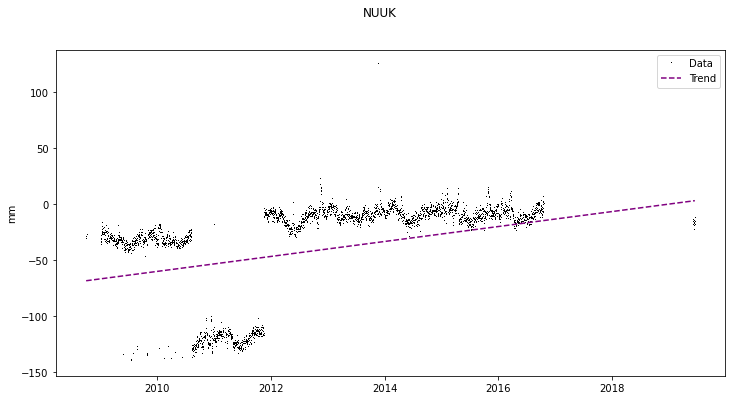

In [48]:
# test_plot_OLS_overlay(df, res, filepath[-24:-20], 'DU', 'meters')
from tidegauge_functions import plot_OLS_overlay

plot_OLS_overlay(df, res, filepath[-24:-20], 'Vertical', 'mm')

## For Nuuk

In [80]:
df_out = df.where(df['Vertical']>-50, df['Vertical']+100, axis=0)\
.where(df['Vertical']<100, axis=0)
df_out

,North,East,Vertical,NorthSTD,EastSTD,VerticalSTD
Year,,,,,,
2008-09-30,-47.0,75.8,-31.1,3.3,2.3,5.4
2008-10-02,-47.3,76.9,-28.8,2.1,1.4,3.5
2008-10-03,-46.3,76.4,-27.5,2.1,1.4,3.5
2009-01-01,-43.1,74.3,-35.0,2.1,1.4,3.4
2009-01-02,-42.6,74.4,-36.5,2.1,1.4,3.5
...,...,...,...,...,...,...
2019-06-14,79.4,-114.4,-17.0,2.1,1.4,3.4
2019-06-15,79.6,-115.7,-22.9,2.1,1.4,3.4
2019-06-16,81.3,-115.4,-15.5,2.1,1.4,3.4


<AxesSubplot:xlabel='Year'>

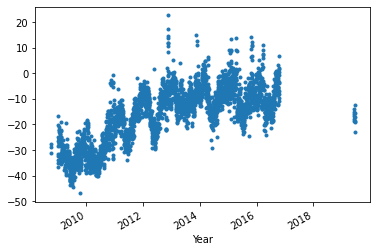

In [81]:
df_out['Vertical'].plot(linestyle='None', marker='.')

In [82]:
columns = ['DATETIME', 'vertical_mm']
out_array = np.array([df_out.index.strftime("%Y-%m-%d %H:%M"),
                      df_out['Vertical']])

df_out = pd.DataFrame(data=out_array.T, columns=columns) #, index=time)
df_out = df_out.apply(pd.to_numeric, errors='ignore')
# df.index = pd.to_datetime(trajectory.index)
df_out.to_csv('data/gps_Nuuk_vertical.csv')  # , na_rep=" ")

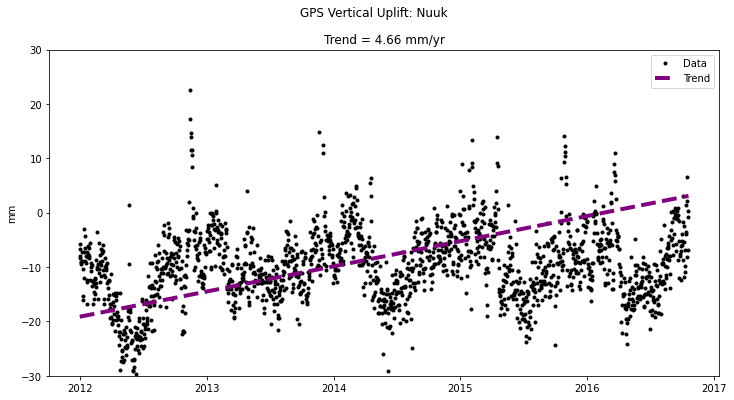

In [28]:
def test_plot_OLS_overlay_Nuuk(df, res, site, var, data_units, simpletrend=True):
    fig, ax = plt.subplots(1, 1, figsize=(12,6));
    ax.plot(df[var].dropna().index, df[var].dropna().values, 
            label='Data', marker='.', linestyle='', color='black')
    
    ## Plot linea model
    if simpletrend:
        ax.plot((df[var].index[0], df[var].index[-1]), 
            (res.params.x1*1 + res.params.const, res.params.x1*df.shape[0] + res.params.const),
               label='Trend', linestyle='--', lw=4, color='purple')
    else:
            ax.plot(df[var].index, [res.params.x1*i + res.params.const for i in np.arange(len(df[var]))])

    ## zero line
#     ax.plot((df[var].index[0], df[var].index[-1]), (0, 0), 'k')
    
    ## customize
    period = df.index.year.value_counts().max()
    ax.set_title(f"Trend = {res.params.x1 * period:.2f} mm/yr");
    
    ax.set_ylim([-30, 30])
    ax.set_ylabel(data_units)
    plt.suptitle(f"GPS Vertical Uplift: {site}")
    plt.legend()
    plt.savefig(f'figs/test_GPS_OLS_{site}.png')
    
    
test_plot_OLS_overlay_Nuuk(df_sonel.loc['2012-01-01':'2017-01-01'], res, 'Nuuk', 'Vertical', 'mm')

%%% as pointed out by isaiah we need to convert time units for our trends

In [42]:
def convert_trend_toyearly(df, res):
    period = df.index.year.value_counts().max()
    yearlytrend = res.params.x1 * period
    
    return yearlytrend

trend = convert_trend_toyearly(df_sonel, res)
print(f'{trend:1.4f} mm/yr')


7.0670 mm/yr


In [44]:
df

,North,East,Vertical,NorthSTD,EastSTD,VerticalSTD
Year,,,,,,
1998-11-15,-27.6,128.2,-45.7,2.7,2.5,8.0
1998-11-16,-25.1,123.1,-43.8,3.1,3.3,8.5
1998-11-17,-26.5,125.1,-40.7,2.6,2.5,8.8
1998-11-19,-26.6,127.3,-41.9,2.7,2.7,8.3
1998-11-20,-25.3,126.3,-34.8,2.8,2.7,8.4
...,...,...,...,...,...,...
2013-12-26,46.2,-213.4,71.8,2.5,2.6,6.7
2013-12-27,44.2,-216.5,69.3,3.2,3.3,8.3
2013-12-28,44.1,-215.8,70.1,2.7,2.5,7.4


## Write to CSV

In [45]:
columns = ['DATETIME', 'vertical_mm']
out_array = np.array([df.index.strftime("%Y-%m-%d %H:%M"),
                      df['Vertical']])

df_out = pd.DataFrame(data=out_array.T, columns=columns) #, index=time)
df_out = df_out.apply(pd.to_numeric, errors='ignore')
# df.index = pd.to_datetime(trajectory.index)
df_out.to_csv('data/gps_THULE2_vertical.csv')  # , na_rep=" ")

## Loop through each file, save trend, and plot ALL WITH FUNCTIONS



data/GPS/dANC2_XXXXXXXXX_NGL14.neu
f: 0
Trend = 6.84 mm/yr


data/GPS/dJNU1_49519S001_NGL14.neu
f: 1
Trend = 49.87 mm/yr


data/GPS/dKEN5_XXXXXXXXX_NGL14.neu
f: 2
Trend = 62.81 mm/yr


data/GPS/dNUUK_43013M001_NGL14.neu
f: 3
Trend = 25.23 mm/yr


data/GPS/dTBON_XXXXXXXXX_NGL14.neu
f: 4
Trend = 12.78 mm/yr


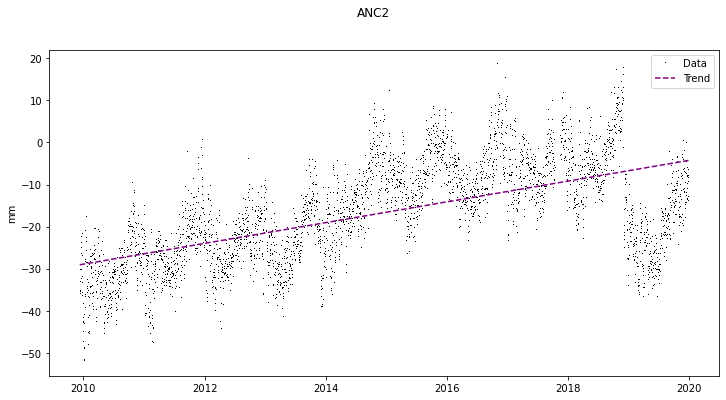

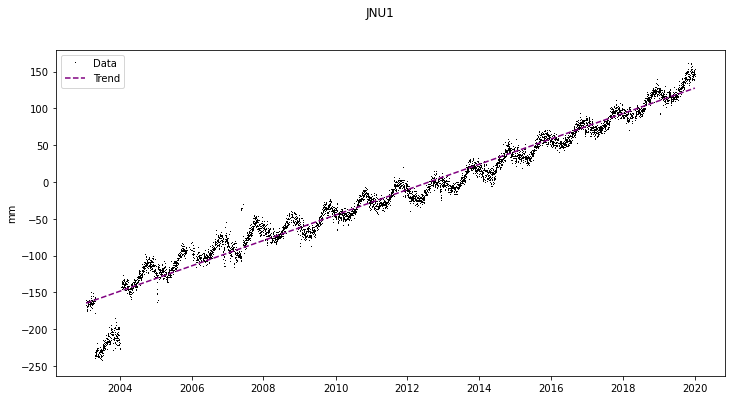

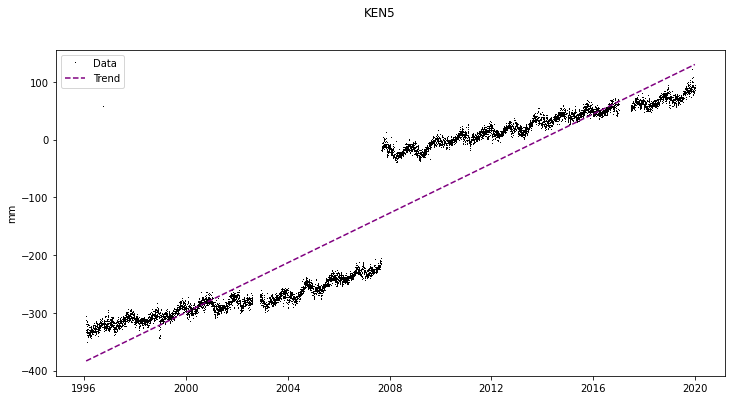

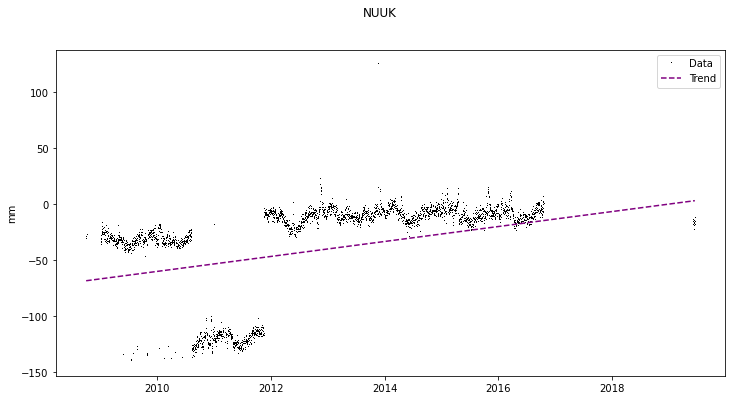

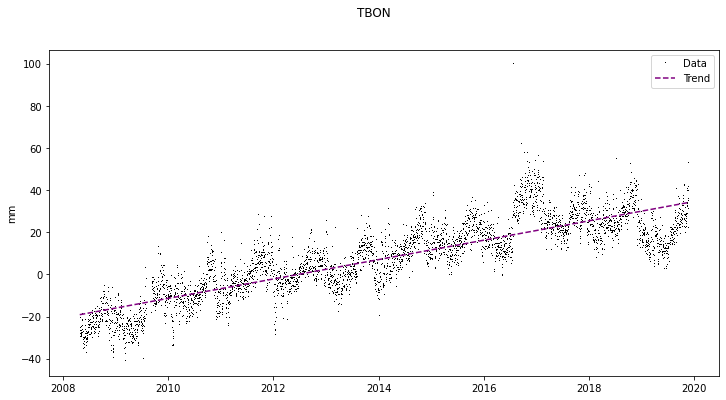

In [30]:
sonel_trend_array = np.full(np.shape(filenames)[0], np.nan)
site_name_array = []


for f, filepath in enumerate(filenames):
    print(f'\n\n{filepath}')
    print(f'f: {f}')
    ## ToDo - extract and keep other important thing about each site from the file...Lat/Lon, name, etc.
    
    # Read in data
    df = read_GPS_SONEL(filepath)

    # Get trend using linear regression
    res = test_calc_OLS(df, 'Vertical')
    sonel_trend_array[f] = res.params.x1
    
    # Save site name
    site_name_array.append(filepath[-24:-20])
    
    print(f"Trend = {sonel_trend_array[f] * 1000:.2f} mm/yr")
#     print(res.summary())

    # Make Plot
    test_plot_OLS_overlay(df, res, filepath[-24:-20], 'Vertical', 'mm')
#     plot_OLS_overlay(df, res, filepath[-24:-20], 'Vertical', 'mm')


In [31]:
print(sonel_trend_array)
print(site_name_array)


[0.00683767 0.04987282 0.06280627 0.02523198 0.0127793 ]
['ANC2', 'JNU1', 'KEN5', 'NUUK', 'TBON']


## Write to CSV

In [32]:
columns = ['TREND_sonel', 'SITE']
out_array = np.array([sonel_trend_array,
                      site_name_array])

df = pd.DataFrame(data=out_array.T, columns=columns) #, index=time)
df = df.apply(pd.to_numeric, errors='ignore')
# df.index = pd.to_datetime(trajectory.index)
df.to_csv('data/trends_OLS_SONEL.csv')  # , na_rep=" ")

### test function to extract some details from a header

In [33]:
def test_get_SONEL_headerinfo(infile):
    with open(infile, "r") as f:
        for line in f:
#             print(line)
            if 'Site ID' in line:
                site = line.split(':')[1].split(' ')[1][:-1]
            if 'Latitude' in line:
                lat = line.split(':')[1].split(' ')[3]
            if 'Longitude' in line:
                lon = line.split(':')[1].split(' ')[1]
            if 'Height' in line:
#                 print(line)
#                 print(line.split(':'))
                height = line.split(':')[1].split(' ')[2]
    
#                 lat = line.index('Latitude')
#                 numbers.append(line[start:start+13])
    
    return site, lat, lon, height

# site_id, latitude, longitude, height = get_SONEL_headerinfo(filenames[0])
test_get_SONEL_headerinfo(filenames[0])

('ANC2', '61.17522442', '-149.98344307', '')

In [34]:
def test_get_SONEL_headerinfo_v2(infile):
    with open(infile, "r") as f:
        for line in f:
#             print(line)
            if 'Site ID' in line:
                print(line)
#                 print(line[line.find(':')+1:].split()[0])
                site = line[line.find(':')+1:].split()[0]
            if 'Latitude' in line:
                lat = line[line.find(':')+1:].split()[0]
            if 'Longitude' in line:
#                 lon = line.split(':')[1].split(' ')[1]
                lon = line[line.find(':')+1:].split()[0]
            if 'Height' in line:
#                 print('\n',line)
#                 print(line.split(':'))
                height = line[line.find(':')+1:].split()[0]
                print(f'Height is {height}')
                
    
#                 lat = line.index('Latitude')
#                 numbers.append(line[start:start+13])
    
    return site, lat, lon, height

# site_id, latitude, longitude, height = get_SONEL_headerinfo(filenames[0])
test_get_SONEL_headerinfo_v2(filenames[-1])

# Site ID: TBON

Height is 93.169


('TBON', '61.17971547', '-149.78514271', '93.169')